https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775

# Importação e tratamento dos dados

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

import src.tera_project_preprocess as preprocess
import src.tera_project_charts as charts

In [2]:
# Importa e transforma o date em tipo datetime e define como index
data_path = 'C:\\Tera\\Projeto\\data\\milho-cepea.csv'
date_column = 'date'
series = preprocess.load_timeseries_csv(data_path,date_column)
series.head()

,RS,US
date,,
2004-01-05,20.83,7.30
2004-01-12,19.66,7.05
2004-07-30,18.14,5.97
2004-08-02,18.24,5.98
2004-08-03,18.04,5.91


In [3]:
series.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4712 entries, 2004-01-05 to 2023-06-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RS      4712 non-null   float64
 1   US      4712 non-null   float64
dtypes: float64(2)
memory usage: 110.4 KB


## Observando se os dados são balenceados ao longo dos anos

In [4]:
# Agrupando os dados por ano
series.groupby(series.index.year).size()

date
2004    106
2005    250
2006    248
2007    247
2008    251
2009    247
2010    248
2011    250
2012    248
2013    250
2014    250
2015    248
2016    250
2017    248
2018    248
2019    251
2020    249
2021    249
2022    250
2023    124
dtype: int64

Observa-se que o ano de 2004 possui bem menos dados que os outros anos. Dessa forma, vamos observar sua distribuição ao longo dos meses

In [5]:
data_2004 = series.loc['2004']
data_2004.groupby(data_2004.index.month).size()


date
1      2
7      1
8     22
9     20
10    20
11    20
12    21
dtype: int64

É possível notar que janeiro possui apenas duas medições e julho apenas uma. Os outros meses seguem a média de dias úteis esperados.
Dessa forma, é indicado retirar esses meses do conjunto de dados

In [6]:
series.drop(series['2004-01':'2004-07'].index, inplace = True)

Usualmente dados de valores negociados na bolsa possuem apenas dados para dias úteis, dessa forma, é indicado avaliar se a série possui algum dia não útil nos seus índices, pois isso indicaria um erro de medida.

Temos como medida de "daysofweek"

    Segunda = 0
    Terça = 1
    Quarta = 2
    Quinta = 3
    Sexta = 4
    Sábado = 5
    Domingo = 6

In [7]:
print(min(series.index.dayofweek))
print(max(series.index.dayofweek))

0
4


Como podemos ver, todos os dias da base de dados variam entre segunda e sexta. Dessa forma, não possuimos dados lançados no sábado ou domingo.

# Análisa exploratória dos dados

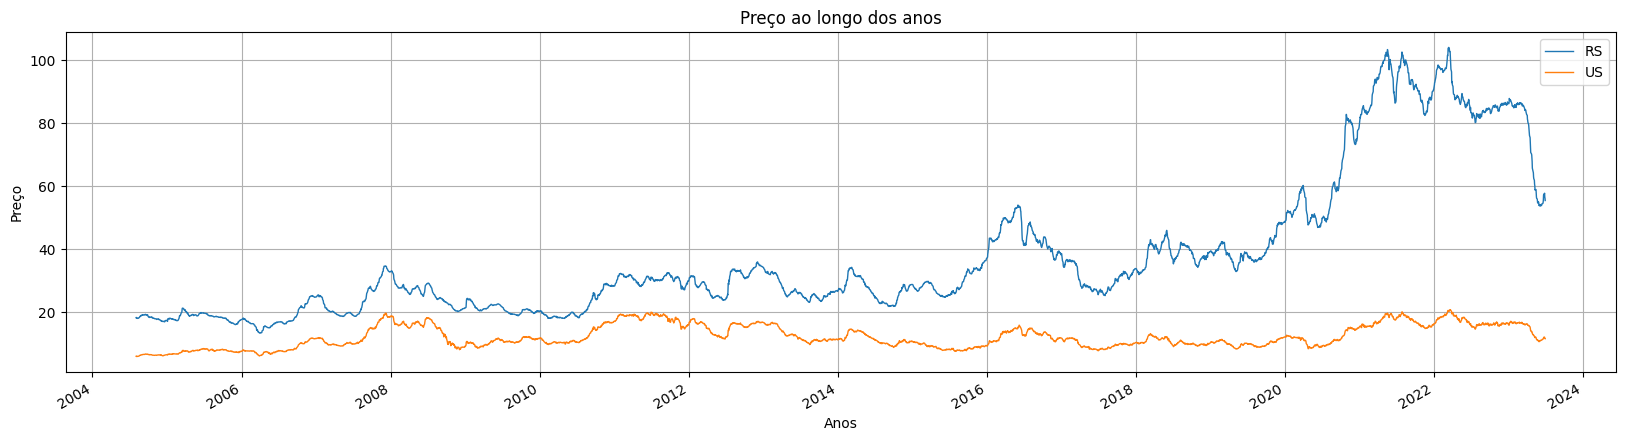

In [8]:
charts.plot_series_line(data=series, title_value='Preço ao longo dos anos', xlabel_value='Anos',ylabel_value='Preço')

## Decomposição

A decomposição de uma série temporal irá dividi-la nas componentes de tendência, sazonalidade e ciclicidade com resíduos.

Vamos analisar a decomposição da série observandos os valores semanais, mensais e anuais, tanto em soma quanto em média, para real e dólar

### Real

#### Semanal Aditivo

C:\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


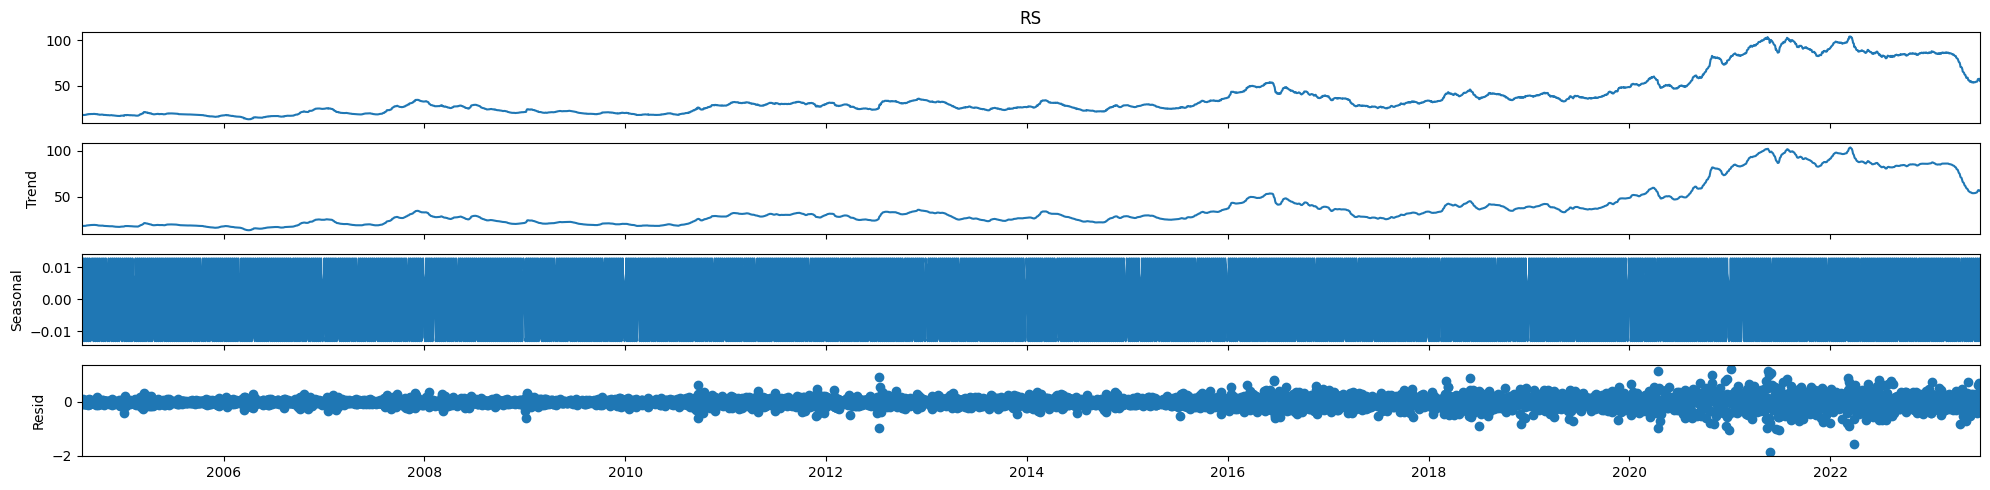

In [9]:
data = series['RS']
week_period = 5
month_period = 20
year_period = 252

semanal_real_add = charts.get_plot_seasonality(data,model='additive', period=week_period)

#### Semanal multiplicativo

C:\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


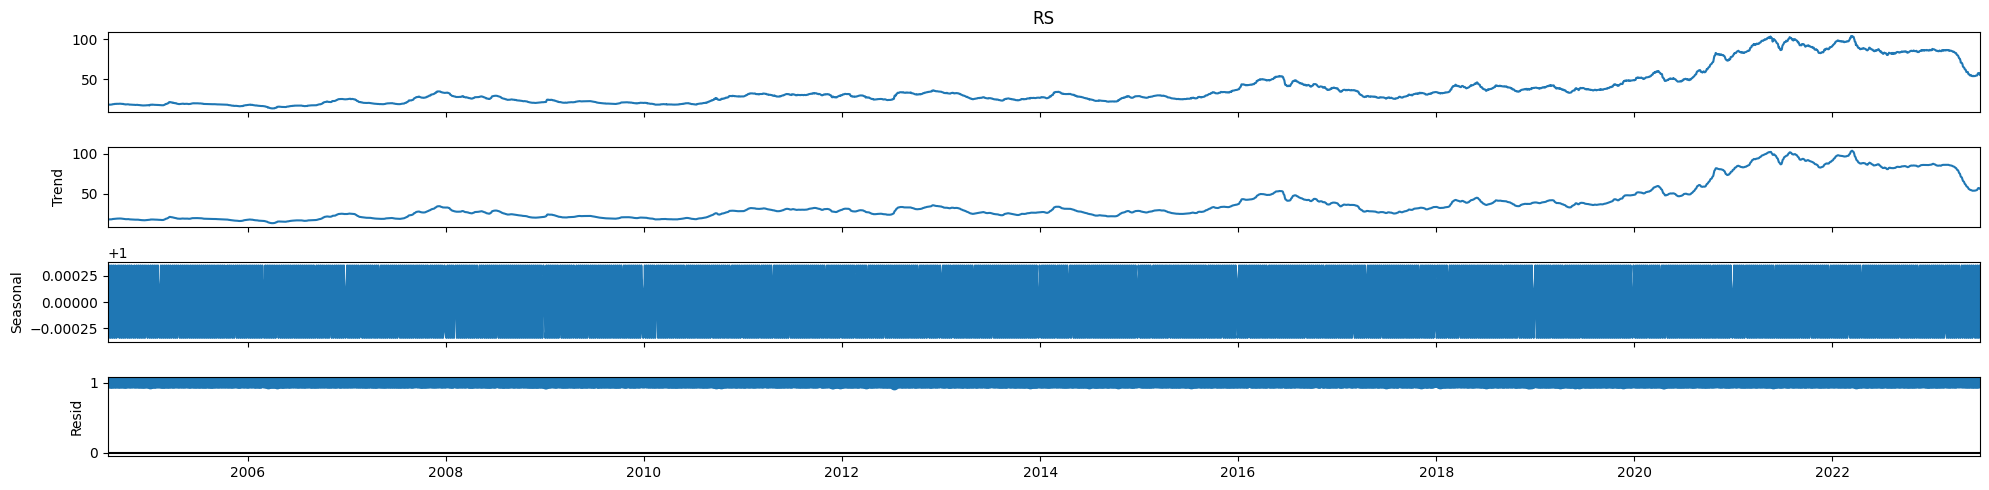

In [10]:
semanal_real_multi = charts.get_plot_seasonality(data,model='multiplicative', period=week_period)

#### Mensal aditivo

C:\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


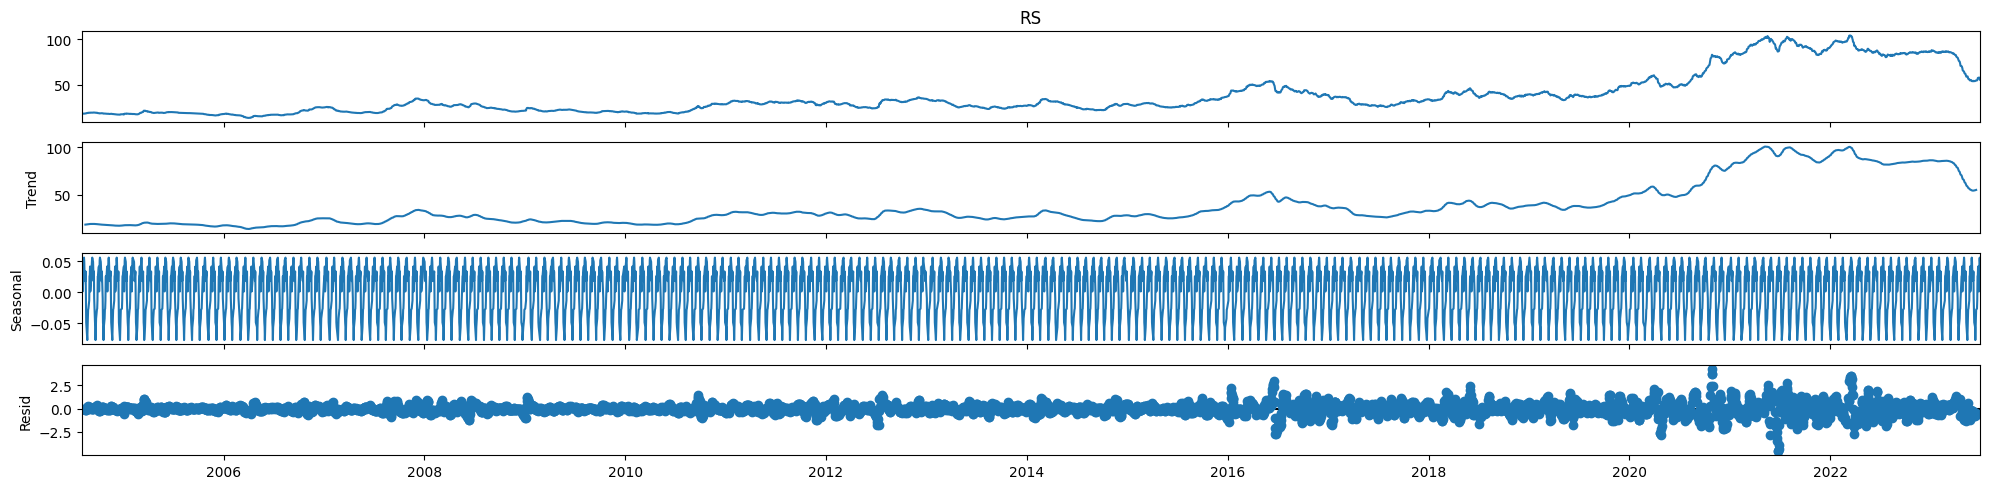

In [11]:
mensal_real_add = charts.get_plot_seasonality(data,model='additive', period=month_period)

#### Mensal multiplicativo

C:\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


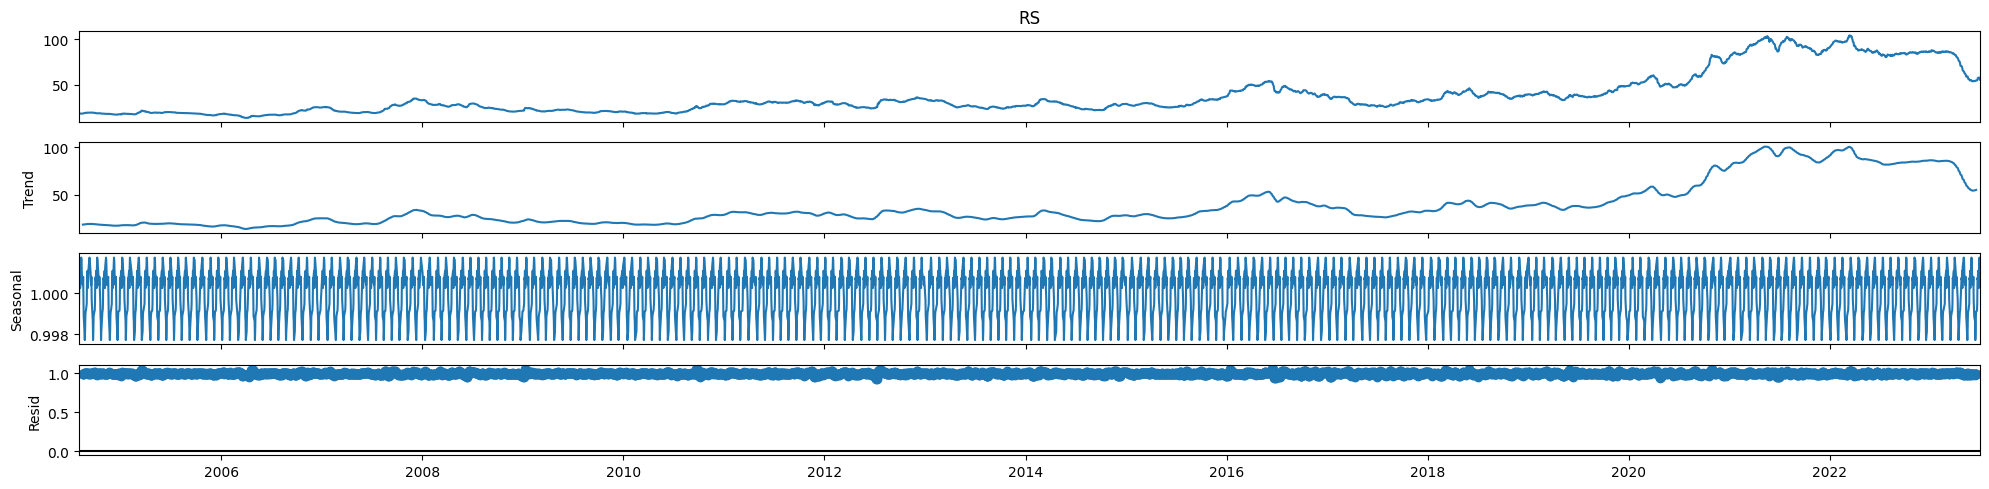

In [12]:
mensal_real_multi = charts.get_plot_seasonality(data,model='multiplicative', period=month_period)

#### Anual aditivo

C:\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


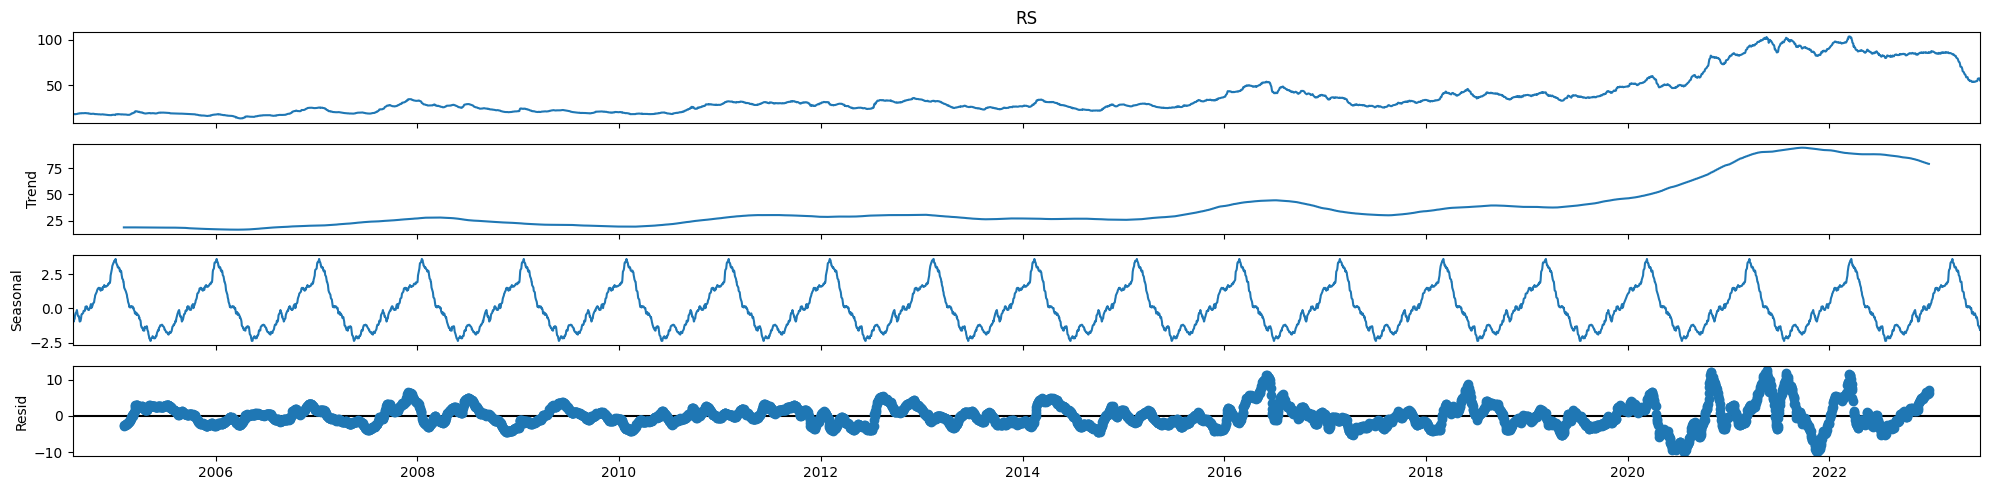

In [13]:
anual_real_add = charts.get_plot_seasonality(data,model='additive', period=year_period)

#### Anual multiplicativo

C:\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


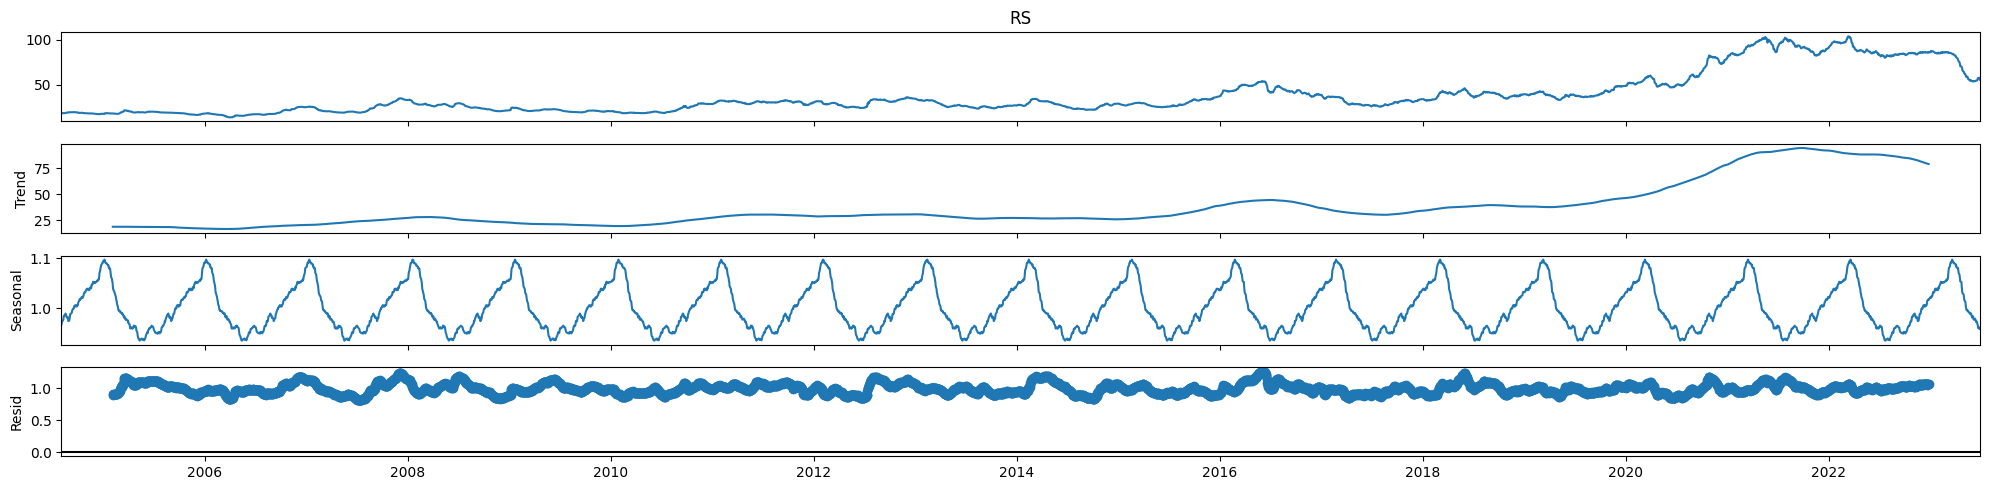

In [14]:
anual_real_multi = charts.get_plot_seasonality(data,model='multi', period=year_period)

#### Comentários

1) A tendência possui dois aumentos significativos, o primeiro sendo em 2016 e o segundo em 2020. Sendo o mais significativo em 2020. Isso pode ser explicado pela crise brasileira que começou em 2015 e teve seu aumento em 2016, levando a um grande aumento do dólar. E a segunda em 2020 é devido a pandemia de covid-19. Podemos observar essas mesmas características em dólar para notarmos se esse aumento é devido somente ao aumento no dólar.

C:\Tera\Projeto\src\tera_project_charts.py:48: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


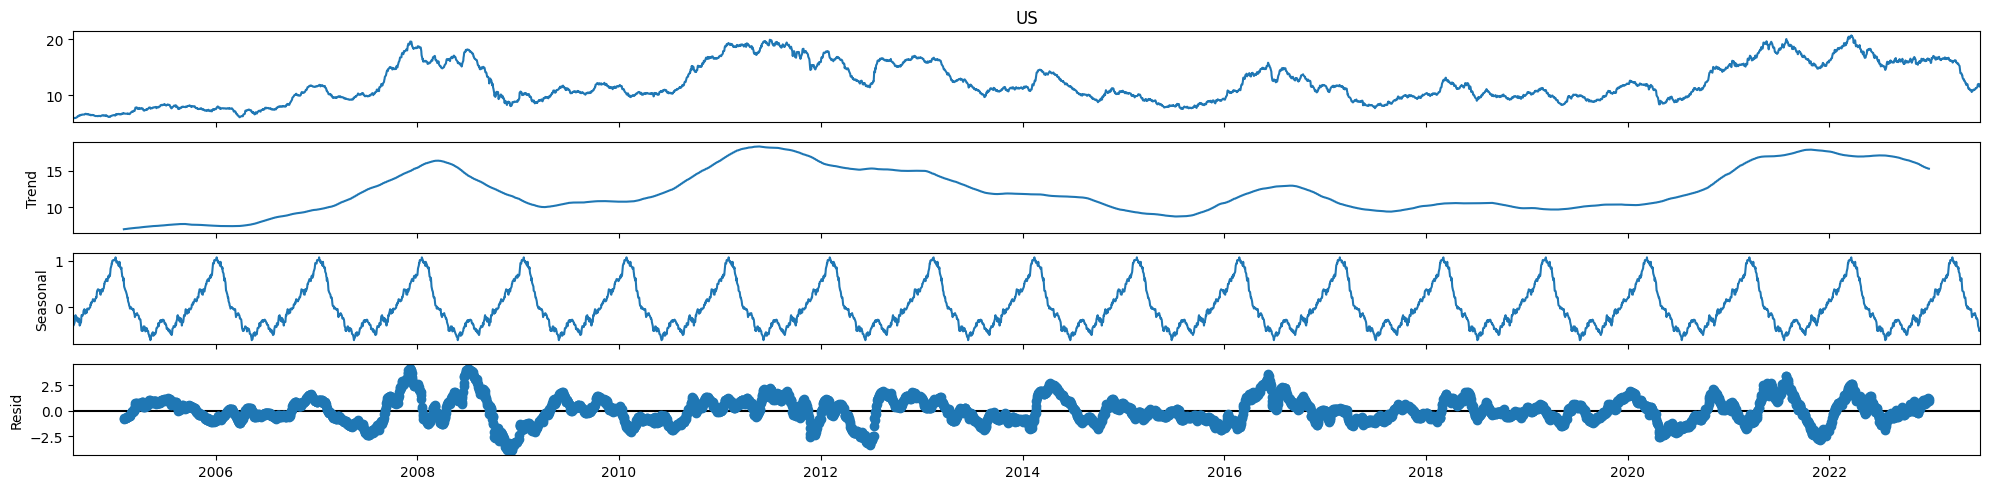

In [15]:
data = series['US']
a_dolar_add = charts.get_plot_seasonality(data,model='additive', period=year_period)

Notamos que em dólar existe um aumento na tendência de preço em 2008 e outra em 2011 que são bem menos relevantes no real. Esse aumento deve ser por conta da crise imobiliária americana em 2008 e em 2011 devido a crise da dívida dos EUA. Porém, também notamos um aumento na tendência tanto em 2016 quanto em 2020.

2) Podemos notar que a sazonalidade se destaca bem no período anual, o que é esperado para um produto de agricultura como o milho, já que temos uma variação de produção de acordo com as estações do ano.

Podemos observar também se existe uma diferença na sazonalidade dos preços em dois anos sem a pandemia da covid com os dois anos da pandemia.

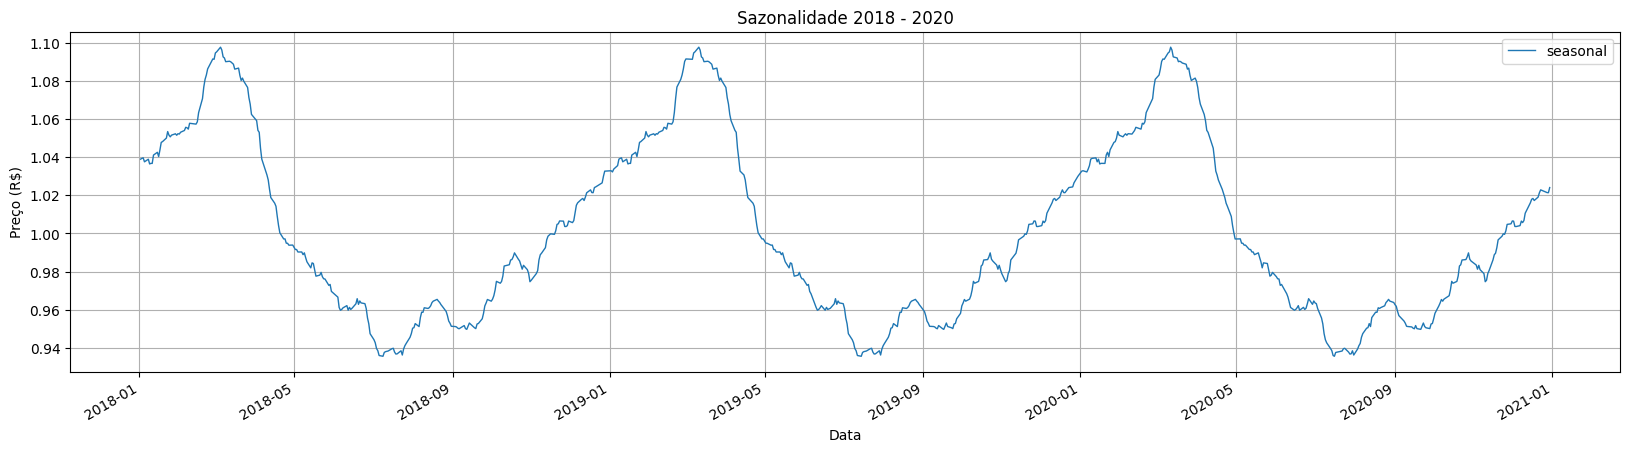

In [16]:
charts.plot_series_line(anual_real_multi.seasonal['2018':'2020'], title_value='Sazonalidade 2018 - 2020', ylabel_value='Preço (R$)', xlabel_value="Data")

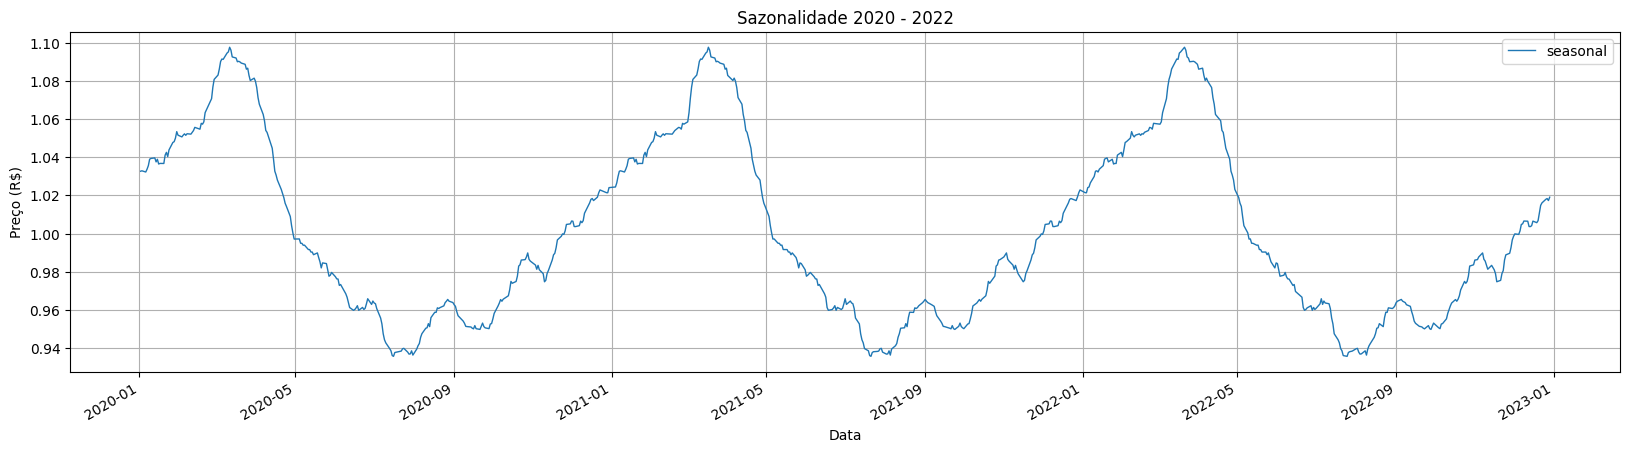

In [17]:
charts.plot_series_line(anual_real_multi.seasonal['2020':'2022'], title_value='Sazonalidade 2020 - 2022', ylabel_value='Preço (R$)', xlabel_value="Data")

A sazonalidade não parece ter mudado nos momentos de pandêmia.

    Pesquisar se a sazonalidade pode mudar ao longo da série temporal

## Normalidade

A maioria dos modelos para séries temporais são mais eficientes se usados em uma série com distribuição normal.

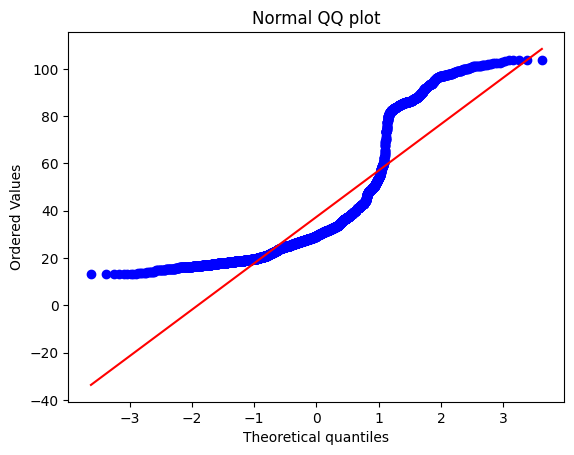

In [18]:
data = series['RS']
charts.get_QQ_plot(data)

Teste Shapiro-Wilk

Critérios:

Nível de significância de 0.05

H0 = distribuição normal (p > 0.05)

H1 = distribuição não normal (p <= 0.05)

In [19]:
data_log = np.log(data)
data_cubic_root = (data)**(1/3)
data_reciprocal = 1 / data
data_exponential = np.exp(data)
data_boxcox = stats.boxcox(data)[0]
data_yeojohnson = stats.yeojohnson(data)[0]

transformations = {
    'Original Data': data,
    'Log Transformation': data_log,
    'Cubic Root Transformation': data_cubic_root,
    'Reciprocal Transformation': data_reciprocal,
    'Exponential Transformation': data_exponential,
    'Box-Cox Transformation': data_boxcox,
    'Yeo-Johnson Transformation': data_yeojohnson
}

results = {}
for name, transformed_data in transformations.items():
    p_value = preprocess.test_normality(transformed_data, method='shapiro-wilk')
    results[name] = p_value

# Print the results
for name, p_value in results.items():
    print(f"{name} - Shapiro-Wilk P-Value: {p_value}")
    if p_value >= 0.05:
        print("The transformed data is normally distributed.")
    else:
        print("The transformed data is not normally distributed.")
    print("-------------------------------------")

Original Data - Shapiro-Wilk P-Value: 0.0
The transformed data is not normally distributed.
-------------------------------------
Log Transformation - Shapiro-Wilk P-Value: 2.802596928649634e-44
The transformed data is not normally distributed.
-------------------------------------
Cubic Root Transformation - Shapiro-Wilk P-Value: 0.0
The transformed data is not normally distributed.
-------------------------------------
Reciprocal Transformation - Shapiro-Wilk P-Value: 8.634957942803698e-28
The transformed data is not normally distributed.
-------------------------------------
Exponential Transformation - Shapiro-Wilk P-Value: 1.0
The transformed data is normally distributed.
-------------------------------------
Box-Cox Transformation - Shapiro-Wilk P-Value: 1.1582099721657627e-28
The transformed data is not normally distributed.
-------------------------------------
Yeo-Johnson Transformation - Shapiro-Wilk P-Value: 7.464060064534934e-29
The transformed data is not normally distribu

c:\Users\Augusto\anaconda3\envs\Tera\Lib\site-packages\scipy\stats\_morestats.py:1877: RuntimeWarning: overflow encountered in cast
  a, w, pw, ifault = _statlib.swilk(y, a[:N//2], init)


Como podemos observar, nenhuma transformação conseguiu trazer a normalidade para a série.

    Pesquisar se existe algum significado com o p-valor do Shapiro-wilk igual a zero ou igual a um

Vamos checar com outro tipo de teste, o D'Agostino-Pearson, usado para datasets com um grande número de amostragem.

In [20]:
for name, transformed_data in transformations.items():
    p_value = preprocess.test_normality(transformed_data, method='dagostino-pearson')
    results[name] = p_value

# Print the results
for name, p_value in results.items():
    print(f"{name} - D'Agostino-Pearson P-Value: {p_value}")
    if p_value >= 0.05:
        print("The transformed data is normally distributed.")
    else:
        print("The transformed data is not normally distributed.")
    print("-------------------------------------")

Original Data - D'Agostino-Pearson P-Value: 3.5710226838751646e-247
The transformed data is not normally distributed.
-------------------------------------
Log Transformation - D'Agostino-Pearson P-Value: 1.1483688263165574e-85
The transformed data is not normally distributed.
-------------------------------------
Cubic Root Transformation - D'Agostino-Pearson P-Value: 3.4013172573683054e-134
The transformed data is not normally distributed.
-------------------------------------
Reciprocal Transformation - D'Agostino-Pearson P-Value: 9.17738947389678e-49
The transformed data is not normally distributed.
-------------------------------------
Exponential Transformation - D'Agostino-Pearson P-Value: 0.0
The transformed data is not normally distributed.
-------------------------------------
Box-Cox Transformation - D'Agostino-Pearson P-Value: 1.966441376720035e-56
The transformed data is not normally distributed.
-------------------------------------
Yeo-Johnson Transformation - D'Agostino

Também nenhuma das transformações aplicadas resultaram em uma distribuição normalizada.
Porém, podemos tentar observar qual das transformações trouxe a série mais próxima da normalidade.

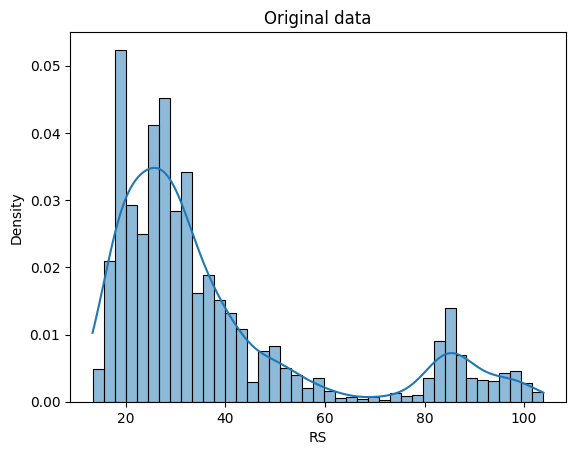

In [21]:
charts.get_density_plot(data, 'Original data')

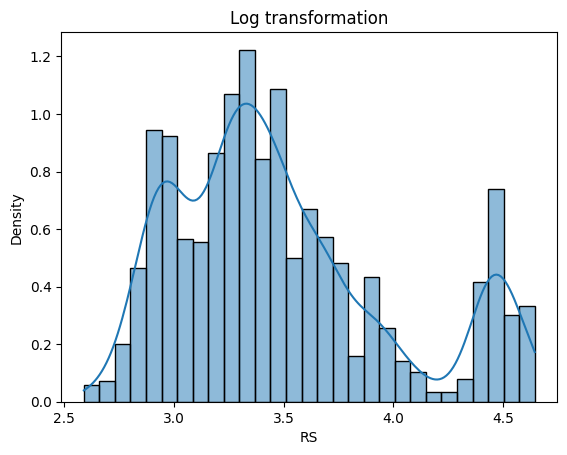

In [22]:
charts.get_density_plot(data_log, 'Log transformation')

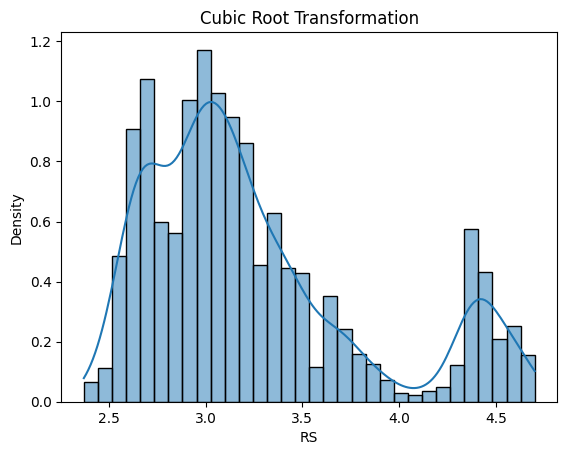

In [23]:
charts.get_density_plot(data_cubic_root, 'Cubic Root Transformation')

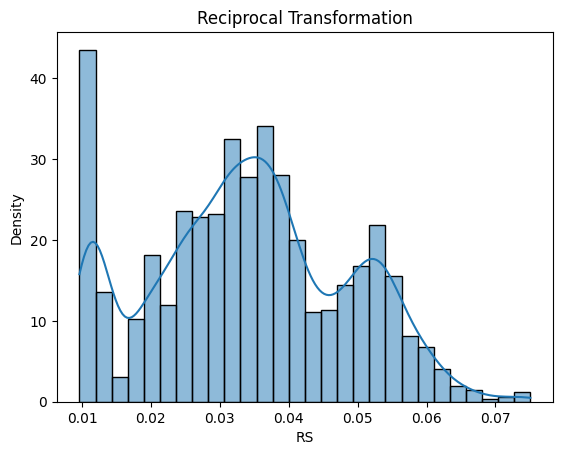

In [24]:
charts.get_density_plot(data_reciprocal, 'Reciprocal Transformation')

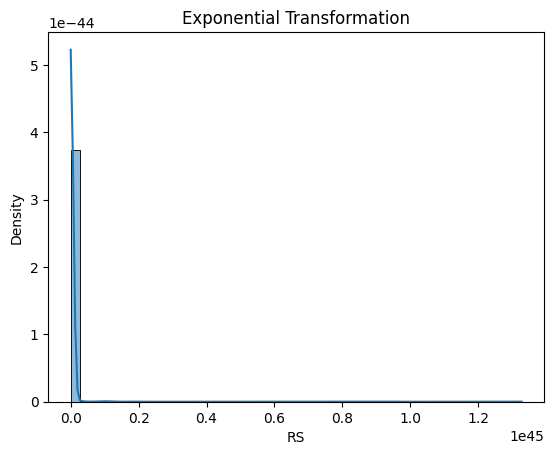

In [25]:
charts.get_density_plot(data_exponential, 'Exponential Transformation', bins=50)

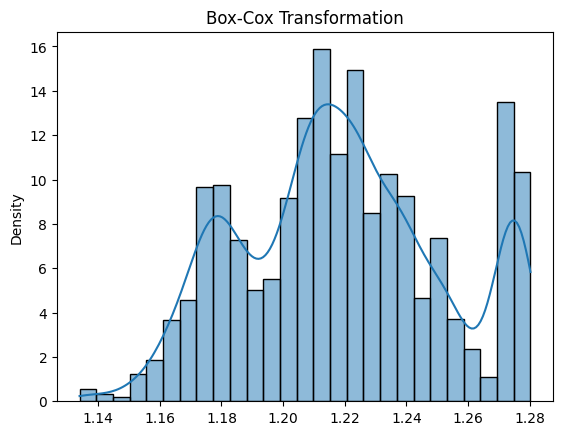

In [26]:
charts.get_density_plot(data_boxcox, 'Box-Cox Transformation')

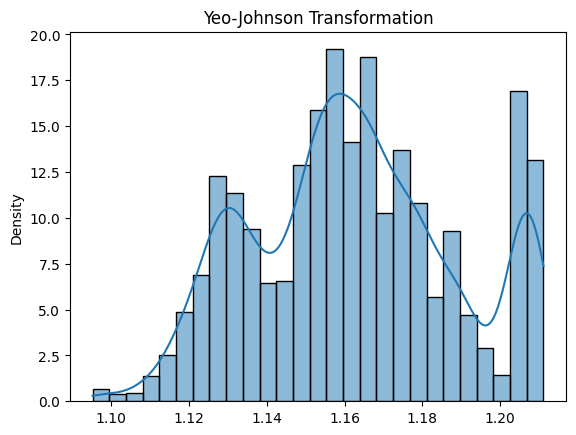

In [27]:
charts.get_density_plot(data_yeojohnson, 'Yeo-Johnson Transformation')

Como podemos observar, provavelmente pelo aumento dos preços na pandêmia, o gráfico de densidade da normalidade fica com um pico muito alto para os valores mais altos.

É importante checar se esse comportamento se repete nos valores em dólar.

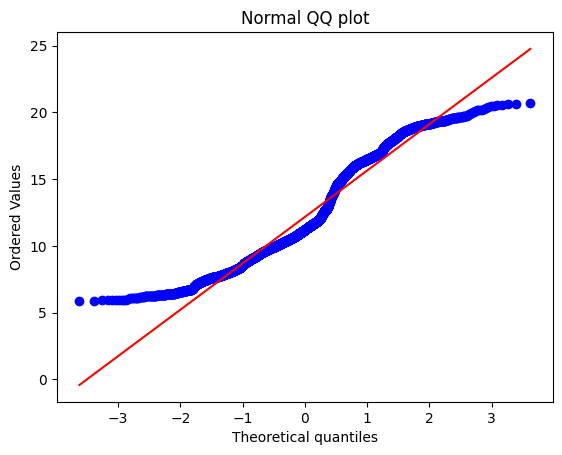

In [28]:
data = series['US']
charts.get_QQ_plot(data)


In [29]:
data_log = np.log(data)
data_cubic_root = (data)**(1/3)
data_reciprocal = 1 / data
data_exponential = np.exp(data)
data_boxcox = stats.boxcox(data)[0]
data_yeojohnson = stats.yeojohnson(data)[0]

transformations = {
    'Original Data': data,
    'Log Transformation': data_log,
    'Cubic Root Transformation': data_cubic_root,
    'Reciprocal Transformation': data_reciprocal,
    'Exponential Transformation': data_exponential,
    'Box-Cox Transformation': data_boxcox,
    'Yeo-Johnson Transformation': data_yeojohnson
}

results = {}
for name, transformed_data in transformations.items():
    p_value = preprocess.test_normality(transformed_data, method='shapiro-wilk')
    results[name] = p_value

for name, p_value in results.items():
    print(f"{name} - Shapiro-Wilk P-Value: {p_value}")
    if p_value >= 0.05:
        print("The transformed data is normally distributed.")
    else:
        print("The transformed data is not normally distributed.")
    print("-------------------------------------")

Original Data - Shapiro-Wilk P-Value: 2.5123529842263564e-38
The transformed data is not normally distributed.
-------------------------------------
Log Transformation - Shapiro-Wilk P-Value: 1.5344163164390863e-30
The transformed data is not normally distributed.
-------------------------------------
Cubic Root Transformation - Shapiro-Wilk P-Value: 3.0797240817461685e-32
The transformed data is not normally distributed.
-------------------------------------
Reciprocal Transformation - Shapiro-Wilk P-Value: 9.89097996664854e-36
The transformed data is not normally distributed.
-------------------------------------
Exponential Transformation - Shapiro-Wilk P-Value: 0.0
The transformed data is not normally distributed.
-------------------------------------
Box-Cox Transformation - Shapiro-Wilk P-Value: 1.4186554195215207e-30
The transformed data is not normally distributed.
-------------------------------------
Yeo-Johnson Transformation - Shapiro-Wilk P-Value: 9.765096763806288e-31
The

In [30]:
for name, transformed_data in transformations.items():
    p_value = preprocess.test_normality(transformed_data, method='dagostino-pearson')
    results[name] = p_value

# Print the results
for name, p_value in results.items():
    print(f"{name} - D'Agostino-Pearson P-Value: {p_value}")
    if p_value >= 0.05:
        print("The transformed data is normally distributed.")
    else:
        print("The transformed data is not normally distributed.")
    print("-------------------------------------")

Original Data - D'Agostino-Pearson P-Value: 5.038397701580994e-186
The transformed data is not normally distributed.
-------------------------------------
Log Transformation - D'Agostino-Pearson P-Value: 8.606411549094119e-148
The transformed data is not normally distributed.
-------------------------------------
Cubic Root Transformation - D'Agostino-Pearson P-Value: 1.279942271544552e-204
The transformed data is not normally distributed.
-------------------------------------
Reciprocal Transformation - D'Agostino-Pearson P-Value: 1.1628591352914036e-48
The transformed data is not normally distributed.
-------------------------------------
Exponential Transformation - D'Agostino-Pearson P-Value: 0.0
The transformed data is not normally distributed.
-------------------------------------
Box-Cox Transformation - D'Agostino-Pearson P-Value: 2.732071196047299e-150
The transformed data is not normally distributed.
-------------------------------------
Yeo-Johnson Transformation - D'Agostin

Mesmo com as transformações, os dados em dólar também não atingem a normalidade.

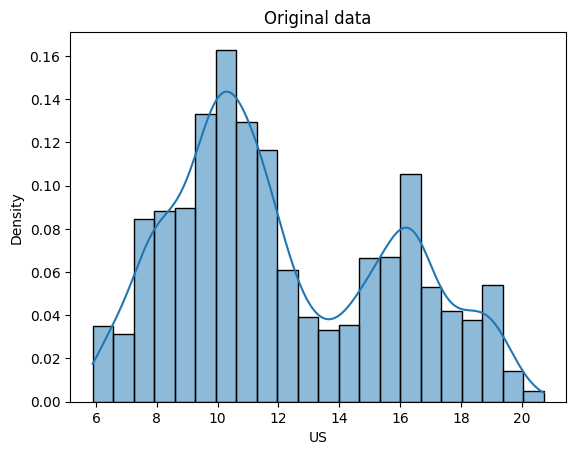

In [31]:
charts.get_density_plot(data, 'Original data')

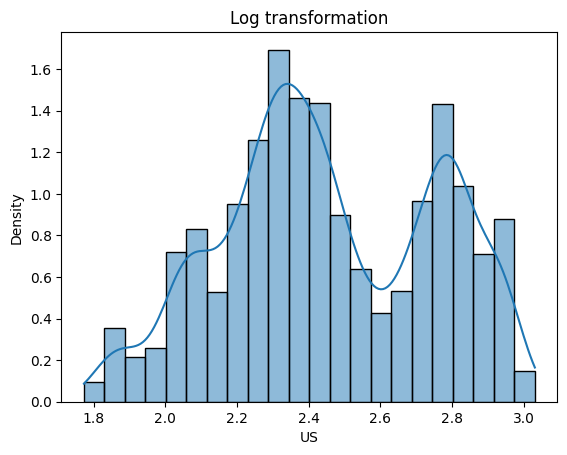

In [32]:
charts.get_density_plot(data_log, 'Log transformation')

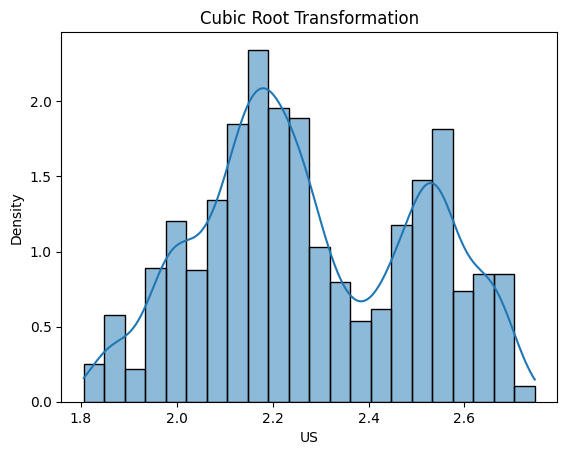

In [33]:
charts.get_density_plot(data_cubic_root, 'Cubic Root Transformation')

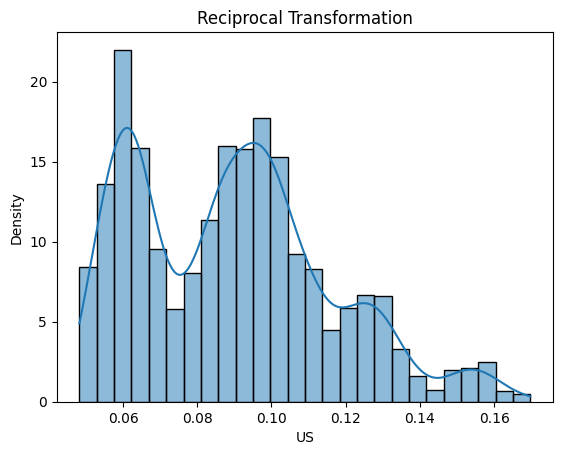

In [34]:
charts.get_density_plot(data_reciprocal, 'Reciprocal Transformation')

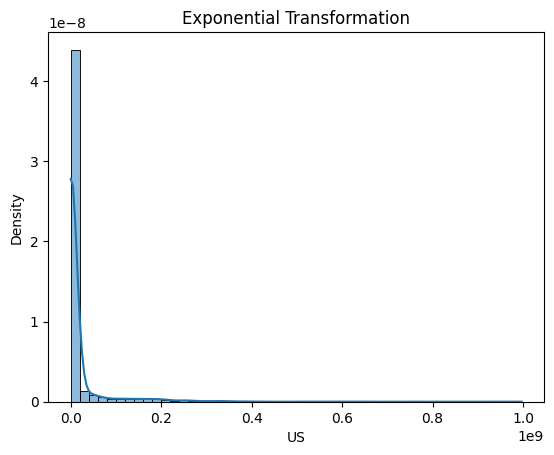

In [35]:
charts.get_density_plot(data_exponential, 'Exponential Transformation', bins=50)

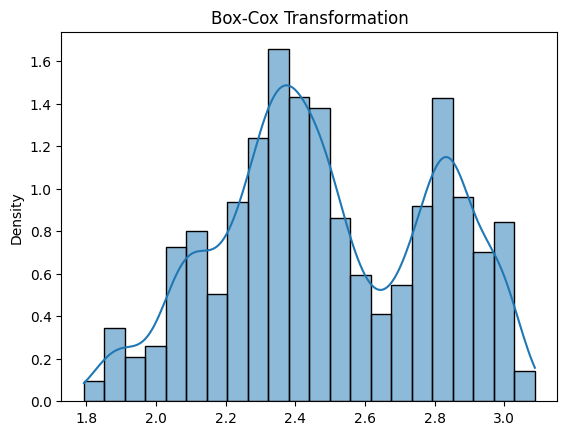

In [36]:
charts.get_density_plot(data_boxcox, 'Box-Cox Transformation')

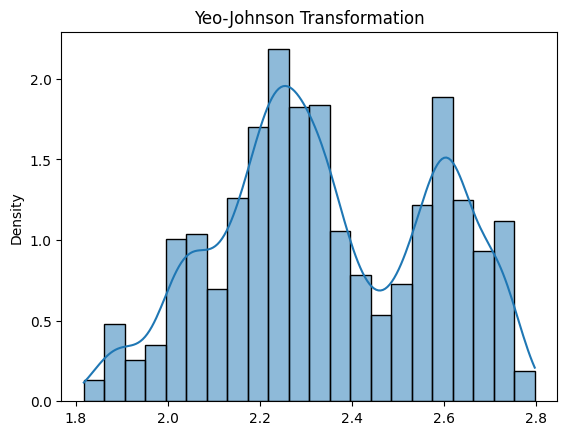

In [37]:
charts.get_density_plot(data_yeojohnson, 'Yeo-Johnson Transformation')

Podemos observar que os dados em dólar ficam também com alguns picos em diferentes valores.

    Devemos escolher o que se aproxima mais da normal?
    p-valor mais alto?

    R. Devemos focar mais na estacionaridade

## Estacionaridade

Augmented Dickey-Fuller Test

Critérios:

Nível de significância de 0.05

H0: não estacionaria (p > 0.05)

H1: estacionaria (p <= 0.05)

In [38]:
data = series['RS']
p_value = preprocess.test_stacionarity(data)
if p_value > 0.05:
    print("The data is not stacionary.")
else:
    print("The data is stacionary.")


The data is not stacionary.


A série original não é estacionária, dessa forma, podemos aplicar o método da diferenciação ou log.

In [39]:
data_log = np.log(data)
p_value = preprocess.test_stacionarity(data_log)
if p_value > 0.05:
    print("The data is not stacionary.")
else:
    print("The data is stacionary.")


The data is not stacionary.


In [40]:
data_diff = np.diff(data)
p_value = preprocess.test_stacionarity(data_diff)
if p_value > 0.05:
    print("The data is not stacionary.")
else:
    print("The data is stacionary.")

The data is stacionary.


Também podemos checar se os dados após a diferenciação possuem uma distribuição normal.

In [41]:
p_value = preprocess.test_normality(data_diff, method='shapiro-wilk')
print(f'p-value for Shapiro-Wilk test: {p_value}')
if p_value >= 0.05:
    print("The transformed data is normally distributed.")
else:
    print("The transformed data is not normally distributed.")

p-value for Shapiro-Wilk test: 0.0
The transformed data is not normally distributed.


In [42]:
p_value = preprocess.test_normality(data_diff, method='dagostino-pearson')
print(f'p-value for DAgostino-Pearson test: {p_value}')
if p_value >= 0.05:
    print("The transformed data is normally distributed.")
else:
    print("The transformed data is not normally distributed.")

p-value for DAgostino-Pearson test: 6.7069974891108555e-171
The transformed data is not normally distributed.


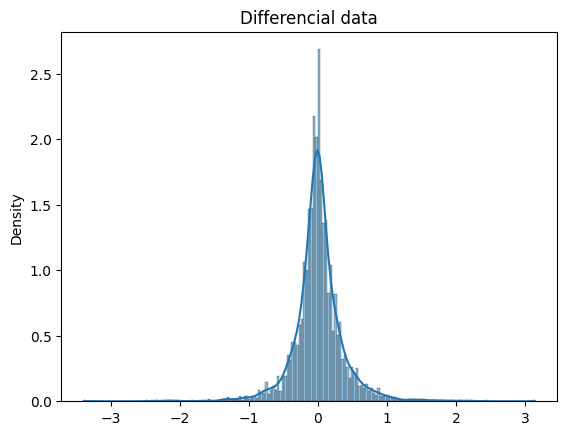

In [43]:
charts.get_density_plot(data_diff, 'Differencial data')

Os dados também não se tornam normalizados após a aplicação de diferenciação.

## Autocorrelação

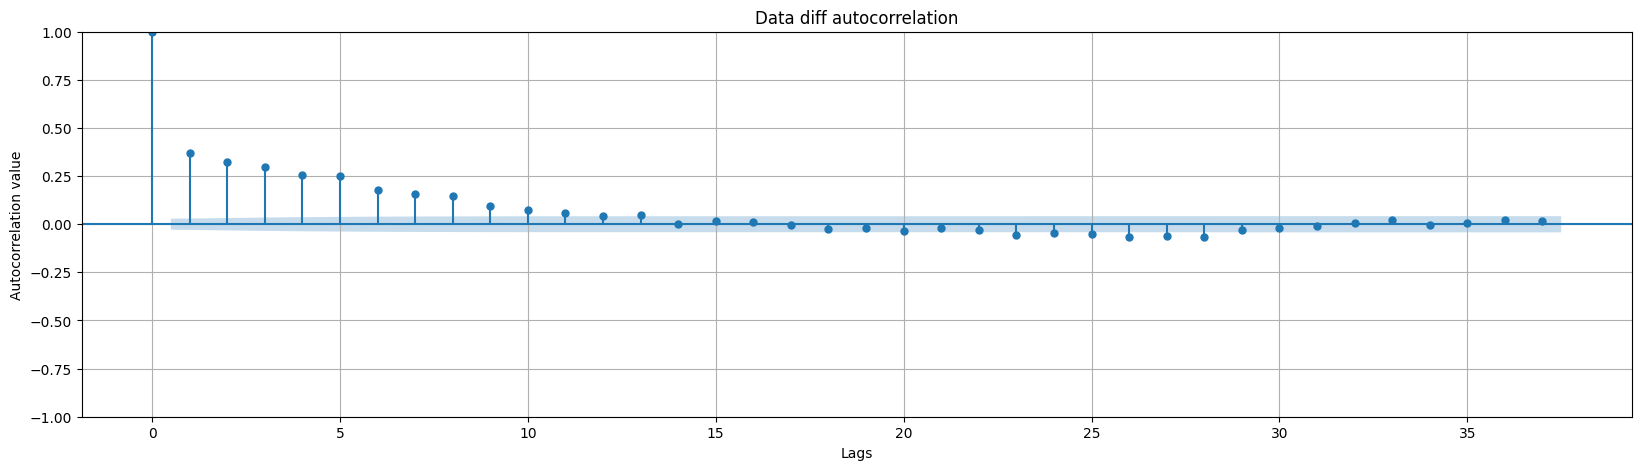

[[0, 1.0],
 [1, 0.3674366558417324],
 [2, 0.32512194258024024],
 [3, 0.2968995278407757],
 [4, 0.253988161362522],
 [5, 0.2521653292404879],
 [6, 0.17658623987694133],
 [7, 0.15552357845587259],
 [8, 0.1450257208510739],
 [9, 0.09600283814720502],
 [10, 0.07266840980559676],
 [11, 0.056415008362879694],
 [23, -0.056132711256256886],
 [25, -0.05272835534312914],
 [26, -0.06831904353057247],
 [27, -0.06168426944521537],
 [28, -0.06783530379702986]]

In [44]:
alpha = 0.05
acf = preprocess.acf_info(data_diff, alpha=alpha, title_value='Data diff autocorrelation')
relevant_acf = []
for i in range(len(acf)):
    if abs(acf[i]) >= alpha:
        relevant_acf.append([i, acf[i]])

relevant_acf

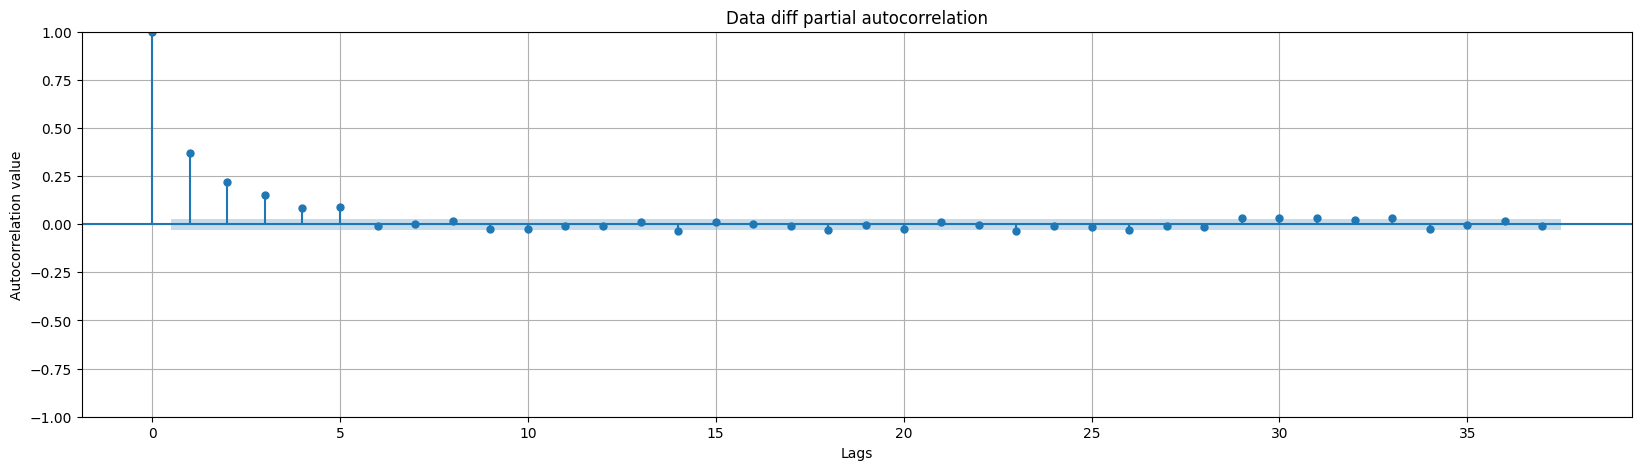

[[0, 1.0],
 [1, 0.3675147175914333],
 [2, 0.21989340582469313],
 [3, 0.14946043151665397],
 [4, 0.08236189280834814],
 [5, 0.088441839920041]]

In [45]:
pacf = preprocess.pacf_info(data_diff, alpha=alpha, title_value='Data diff partial autocorrelation')
relevant_pacf = []
for i in range(len(pacf)):
    if abs(pacf[i]) >= alpha:
        relevant_pacf.append([i, pacf[i]])

relevant_pacf

É possível notar que existe correlações relevantes para a autocorrelação e para a autocorrelação parcial usando um intervalo de confiança de 95%. No primeiro, até o lag 11 e em seguida à partir do lag 23 até o 28. E na parcial, até o lag 5.

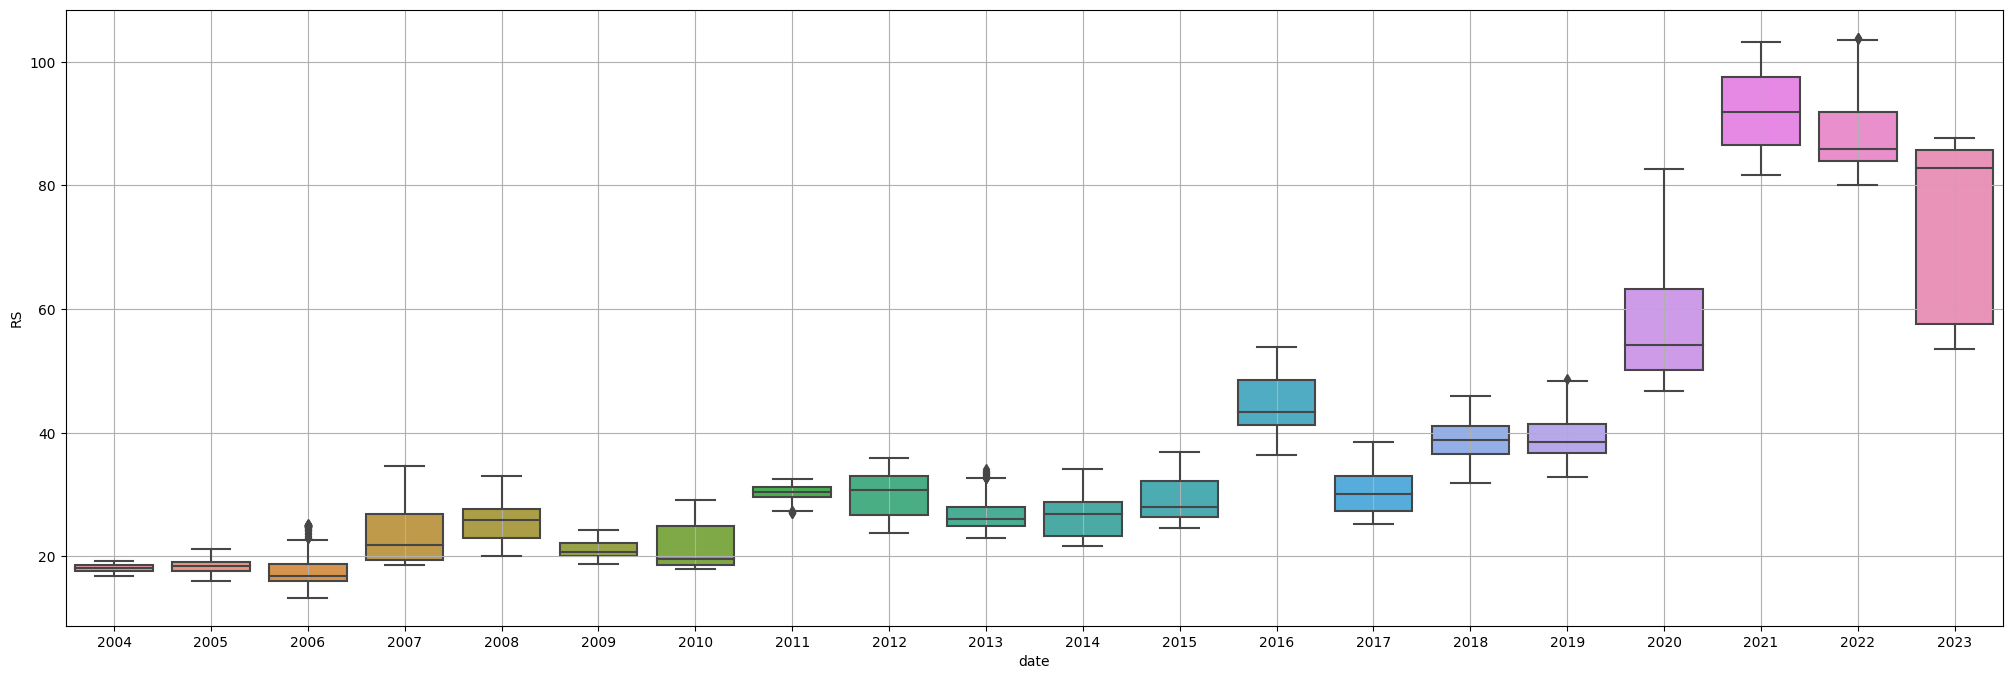

In [46]:
# https://archive.is/KkNL2#selection-849.0-859.24

import seaborn as sns
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = series.index.year, 
            y = series['RS'], 
            ax = ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

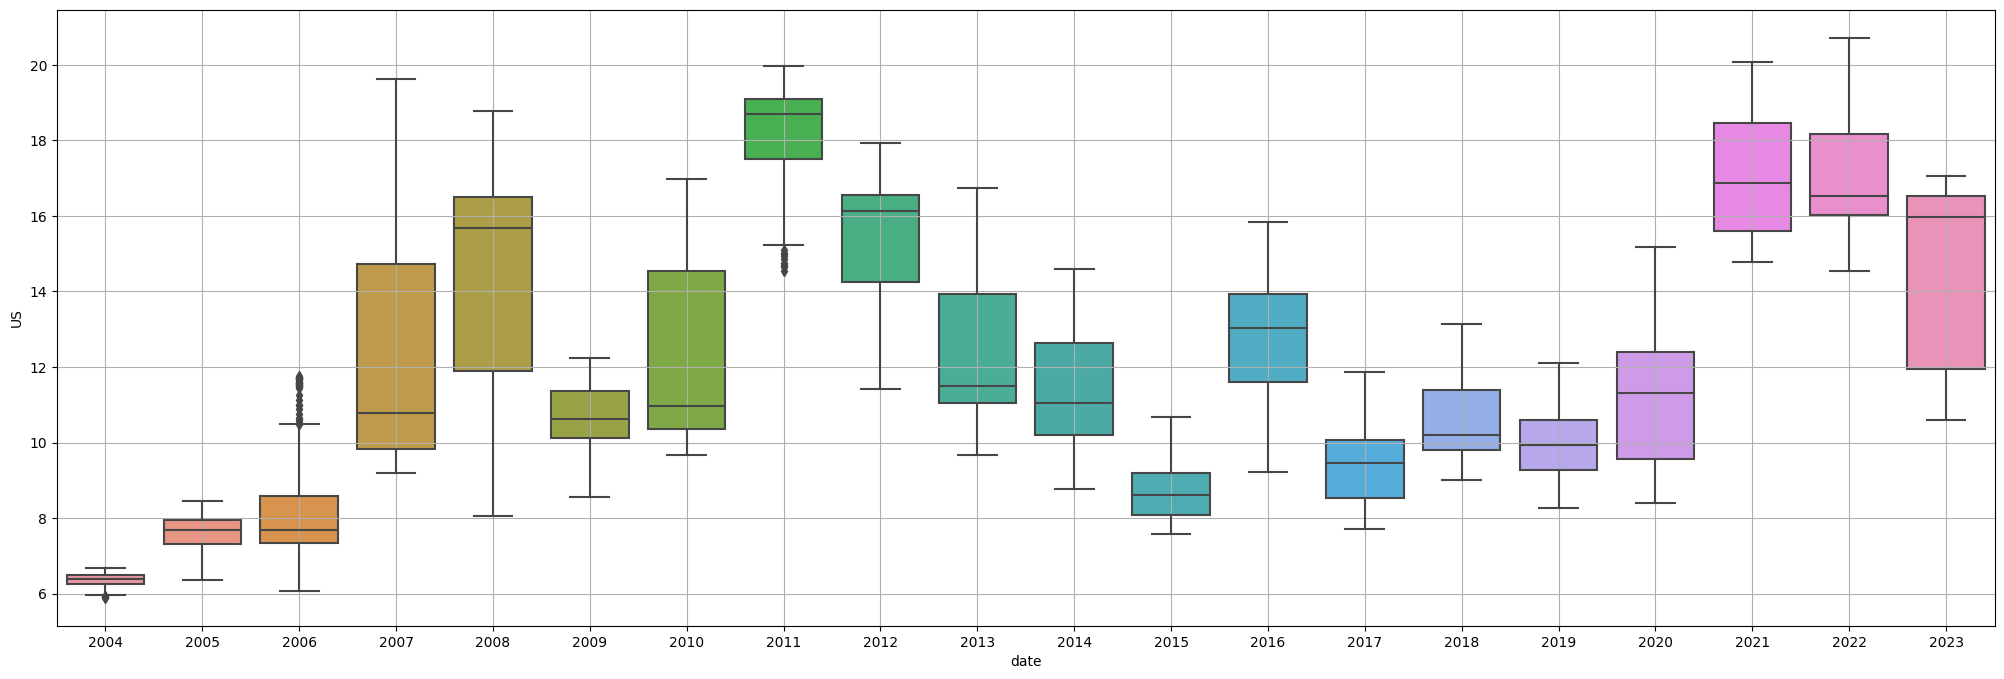

In [47]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = series.index.year, 
            y = series['US'], 
            ax = ax)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [48]:
import plotly.express as px
import pandas as pd

fig = px.line(series, x=series.index, y='US', title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [49]:
import requests
requisicao = requests.get("https://economia.awesomeapi.com.br/last/USD-BRL,EUR-BRL,BTC-BRL")
requisicao_dict = requisicao.json()
requisicao_dict['USDBRL']['bid']

'4.8738'

A maioria dos modelos para séries temporais são mais eficientes se usados em uma série com distribuição normal.

    1) A transformação mais usada é a log, indicada para distribuição assimétrica positiva e variação crescente com a média, porém, restrita a valores positivos.
    2) Transformação exponencial é usada quando não podemos usar a log
    3) Box-cox só pode ser usada em valores positivos e utiliza a função lambda.

Vários modelos possuem o pressuposto de que a série precisa ser estacionária

    1) A diferenciação pode ser usada para isso e pode ser usada mais de uma vez
    